https://github.com/stevenjson/CuisineClassifying  
https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [3]:
import os
import re

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt

In [4]:
# recipes = pd.DataFrame(columns=['cuisine', 'ingredients']
regex = re.compile('[^a-zA-Z ]')

In [5]:
data_path = 'Data'

rows = []
for root, _, file in os.walk('Data'):
    for filename in file:
        if '.txt' in filename:
            cuisine = os.path.splitext(filename)[0]
            text_file = open(os.path.join(data_path, filename), "r")
            lines = text_file.readlines()
            for line in lines:
                regex.sub('', 'ab3d*E')
                row = {
                    'cuisine': cuisine,
                    'ingredients': regex.sub('', line)
                }
                rows.append(row)
            text_file.close()

recipes = pd.DataFrame.from_dict(rows)

In [6]:
recipes.head()

,cuisine,ingredients
0,italian,ounce package lasagna noodles tablespoons ...
1,italian,pounds coarsely ground pork pounds sweet I...
2,italian,cup allpurpose flour for coating teaspoon sa...
3,italian,slices bacon green onions chopped cloves g...
4,italian,pounds coarsely ground pork pounds sweet I...


In [7]:
recipes.shape

(1500, 2)

In [8]:
recipes.groupby('cuisine').count()

,ingredients
cuisine,
african,120
caribbean,180
chinese,180
french,180
indian,120
irish,120
italian,180
japanese,120
mexican,180


In [9]:
recipes.isnull().sum(axis = 0)

cuisine        0
ingredients    0
dtype: int64

In [10]:
recipes['cuisine_id'] = recipes['cuisine'].factorize()[0]
recipes = recipes.sample(frac=1).reset_index(drop=True)  # random order
recipes.head()

,cuisine,ingredients,cuisine_id
0,caribbean,teaspoon white sugar tablespoon lime juice ...,1
1,african,tablespoons olive oil cups chopped yams lar...,8
2,african,ounce can fava beans tablespoons olive oil...,8
3,chinese,tablespoons canola oil cloves garlic choppe...,7
4,irish,small red new potatoes cups chicken broth l...,6


In [11]:
cuisine_id_df = recipes[['cuisine', 'cuisine_id']]
cuisine_to_id = dict(cuisine_id_df.values)
id_to_cuisine = dict(cuisine_id_df[['cuisine_id', 'cuisine']].values)

In [12]:
id_to_cuisine

{1: 'caribbean',
 8: 'african',
 7: 'chinese',
 6: 'irish',
 0: 'italian',
 3: 'mexican',
 5: 'french',
 4: 'indian',
 9: 'middleeastern',
 2: 'japanese'}

In [13]:
recipes.head()

,cuisine,ingredients,cuisine_id
0,caribbean,teaspoon white sugar tablespoon lime juice ...,1
1,african,tablespoons olive oil cups chopped yams lar...,8
2,african,ounce can fava beans tablespoons olive oil...,8
3,chinese,tablespoons canola oil cloves garlic choppe...,7
4,irish,small red new potatoes cups chicken broth l...,6


In [14]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(recipes.ingredients).toarray()
labels = recipes.cuisine_id
features.shape

(1500, 6326)

In [15]:
from sklearn.feature_selection import chi2

N = 2
for cuisine, cuisine_id in sorted(cuisine_to_id.items()):
    features_chi2 = chi2(features, labels == cuisine_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(cuisine))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'african':
  . Most correlated unigrams:
. peanut
. apricots
  . Most correlated bigrams:
. dried apricots
. peanut butter
# 'caribbean':
  . Most correlated unigrams:
. sazon
. lime
  . Most correlated bigrams:
. orange juice
. lime juice
# 'chinese':
  . Most correlated unigrams:
. wok
. soy
  . Most correlated bigrams:
. sesame oil
. soy sauce
# 'french':
  . Most correlated unigrams:
. crepe
. brie
  . Most correlated bigrams:
. herbes provence
. swiss cheese
# 'indian':
  . Most correlated unigrams:
. garam
. masala
  . Most correlated bigrams:
. ground turmeric
. garam masala
# 'irish':
  . Most correlated unigrams:
. buttermilk
. soda
  . Most correlated bigrams:
. stout beer
. baking soda
# 'italian':
  . Most correlated unigrams:
. basil
. parmesan
  . Most correlated bigrams:
. grated parmesan
. parmesan cheese
# 'japanese':
  . Most correlated unigrams:
. dashi
. mirin
  . Most correlated bigrams:
. miso paste
. rice vinegar
# 'mexican':
  . Most correlated unigrams:
. sal

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(recipes['ingredients'], recipes['cuisine'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [17]:
# from https://www.realsimple.com/food-recipes/browse-all-recipes/tortilla-soup-pork-squash
raw_test_recipe = "1 2 1/2  to 3 pound boneless pork shoulder or butt, trimmed and cut in half 1 small butternut squash (about 1 1/2 pounds)—peeled, seeded, and cut into 1 inch pieces 1 14.5 ounce can diced tomatoes 1 jalapeño pepper, seeded and chopped 2 cloves garlic, chopped 1 tablespoon chili powder kosher salt 4 6 inch corn tortillas, cut into 1/2 inch wide strips 1 tablespoon canola oil sliced radishes, cilantro sprigs, and lime wedges, for serving"
test_recipe = regex.sub('', raw_test_recipe)

In [18]:
print(clf.predict(count_vect.transform([test_recipe])))

['mexican']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

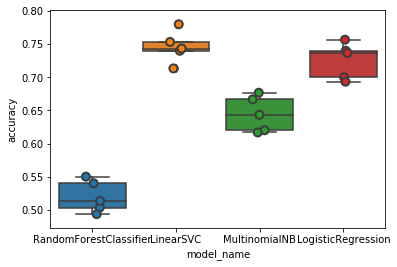

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [20]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.746000
LogisticRegression        0.725333
MultinomialNB             0.644667
RandomForestClassifier    0.520000
Name: accuracy, dtype: float64

In [21]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, recipes.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
cuisine_id_df.head()

,cuisine,cuisine_id
0,caribbean,1
1,african,8
2,african,8
3,chinese,7
4,irish,6


In [23]:
from sklearn.metrics import confusion_matrix
# Fix this
# conf_mat = confusion_matrix(y_test, y_pred)
# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=cuisine_id_df.cuisine.values, yticklabels=cuisine_id_df.cuisine.values)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

In [24]:
from IPython.display import display
# TODO fix this
# for predicted in cuisine_id_df.cuisine_id:
#   for actual in cuisine_id_df.cuisine_id:
#     if predicted != actual and conf_mat[actual, predicted] >= 10:
#       print("'{}' predicted as '{}' : {} examples.".format(id_to_cuisine[actual], id_to_cuisine[predicted], conf_mat[actual, predicted]))
#       display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
#       print('')

In [26]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=recipes['cuisine'].unique()))

               precision    recall  f1-score   support

    caribbean       0.80      0.78      0.79        65
      african       0.71      0.62      0.66        66
      chinese       0.81      0.55      0.66        40
        irish       0.80      0.84      0.82        58
      italian       0.78      0.77      0.77        47
      mexican       0.56      0.62      0.59        53
       french       0.59      0.86      0.70        35
       indian       0.72      0.89      0.80        53
middleeastern       0.74      0.50      0.60        40
     japanese       0.68      0.66      0.67        38

    micro avg       0.72      0.72      0.72       495
    macro avg       0.72      0.71      0.71       495
 weighted avg       0.72      0.72      0.71       495



In [31]:
raw_test_recipe = "1 2 1/2  to 3 pound boneless pork shoulder or butt, trimmed and cut in half 1 small butternut squash (about 1 1/2 pounds)—peeled, seeded, and cut into 1 inch pieces 1 14.5 ounce can diced tomatoes 1 jalapeño pepper, seeded and chopped 2 cloves garlic, chopped 1 tablespoon chili powder kosher salt 4 6 inch corn tortillas, cut into 1/2 inch wide strips 1 tablespoon canola oil sliced radishes, cilantro sprigs, and lime wedges, for serving"
test_recipe = regex.sub('', raw_test_recipe)
# rec_pred = model.predict([[test_recipe]])

print(model.predict(count_vect.transform([test_recipe])))

ValueError: X has 3262 features per sample; expecting 6326

In [36]:
# from https://www.realsimple.com/food-recipes/browse-all-recipes/tortilla-soup-pork-squash
raw_test_recipe = "1 2 1/2  to 3 pound boneless pork shoulder or butt, trimmed and cut in half 1 small butternut squash (about 1 1/2 pounds)—peeled, seeded, and cut into 1 inch pieces 1 14.5 ounce can diced tomatoes 1 jalapeño pepper, seeded and chopped 2 cloves garlic, chopped 1 tablespoon chili powder kosher salt 4 6 inch corn tortillas, cut into 1/2 inch wide strips 1 tablespoon canola oil sliced radishes, cilantro sprigs, and lime wedges, for serving"
test_recipe = regex.sub('', raw_test_recipe)
print(clf.predict(count_vect.transform([test_recipe])))
# features = tfidf.fit_transform(recipes.ingredients).toarray()
# ttt = tfidf.transform(test_recipe)
# print(clf.predict(count_vect.transform([ttt])))

['mexican']


In [37]:
from joblib import dump, load
dump(clf, 'clf_01.joblib')

['clf_01.joblib']

In [38]:
clf2 = load('clf_01.joblib') 

In [39]:
print(clf2.predict(count_vect.transform([test_recipe])))

['mexican']
